In [640]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca
import locale
from locale import atof
import warnings
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import f_regression
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import xlrd
from sklearn import ensemble
import time
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from surprise import SVD, evaluate
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn import ensemble

In [641]:
# Read and import data
answers = pd.read_csv('WOW Raw Data HST n468.csv', encoding='latin-1')
answers.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score,University - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score,University - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""Orderer_Score""}","{""ImportId"":""Influencer_Score""}","{""ImportId"":""Benefactor_Score""}","{""ImportId"":""Harmonizer_Score""}","{""ImportId"":""Investigator_Score""}","{""ImportId"":""Quantifier_Score""}","{""ImportId"":""Distiller_Score""}","{""ImportId"":""Innovator_Score""}","{""ImportId"":""Creator_Score""}","{""ImportId"":""University_c0047d9203b54c45913930..."
2,22/11/17 19:40,22/11/17 19:42,0,159.147.77.160,100,101,1,22/11/17 19:42,R_1FEes0inThNaSwJ,Arevalo,...,12,11,11,11,12,10,11,11,14,Unknown
3,22/11/17 19:39,22/11/17 19:42,0,62.151.145.42,100,190,1,22/11/17 19:42,R_bswgyUCVb5YgvlP,Kuckreja,...,7,6,15,13,10,5,9,13,5,NaN
4,22/11/17 19:39,22/11/17 19:42,0,78.30.8.64,100,176,1,22/11/17 19:42,R_42yxYo5FhixO5mZ,Hernndez,...,9,11,6,7,13,15,13,13,11,Unknown


In [642]:
#Analyse types of variables
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 88 columns):
StartDate                470 non-null object
EndDate                  470 non-null object
Status                   470 non-null object
IPAddress                470 non-null object
Progress                 470 non-null object
Duration (in seconds)    470 non-null object
Finished                 470 non-null object
RecordedDate             470 non-null object
ResponseId               470 non-null object
RecipientLastName        470 non-null object
RecipientFirstName       470 non-null object
RecipientEmail           470 non-null object
ExternalReference        2 non-null object
LocationLatitude         470 non-null object
LocationLongitude        470 non-null object
DistributionChannel      469 non-null object
UserLanguage             3 non-null object
Q1                       2 non-null object
Q2                       470 non-null object
Q3                       470 non-null object
Q

In [643]:
#Identify all the columns in the file
answers.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q44_1', 'Q44_2', 'Q44_3', 'SC0',
       'SC1', 'SC2', 'SC3', 'SC4', 'SC5', 'SC6', 'SC7', 'SC8', 'SC9',
       'Program', 'Section', 'Type of Degree', 'Gender', 'City', 'Country',
       'PostCode', 'Age', 'Birth', 'Nationality', 'Degree', 'Title',
       'University', 'PrivateEmail', 'Address', 'Identification',
       'Catalyst_Score', 'Orderer_Score', 'Influencer_Score',
       'Benefactor_Score', 'Harmonizer_Score', 'Investigator_Score',
  

In [644]:
#Identify unique values in the Section Area
answers.Section.unique()

array(['Section', '{"ImportId":"Section"}', 'MVDM-01', 'MCC-01', 'MBD-01',
       'MCC-02', 'MRCB-01', 'GMBD-01', 'MTDHR-01', 'MBD-02', 'BIP-2015',
       'MVDM-02', 'MCXI-01', 'MCS-01', 'BIC-2016', 'EXMPLS-01', 'MRCB-02',
       'BIP-2016', 'BIP-2017', 'BIC-2015', 'BIS-2017', 'BIS-2016',
       'BIP-2014', 'BIC-2017', 'EMCC-01', 'BIC-2014'], dtype=object)

In [645]:
#Drop additional information that we are not using for the model
answers1 = answers.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage','Program','Type of Degree','City', 'Country',
       'PostCode', 'Age', 'Birth', 'Nationality', 'Degree', 'Title',
       'University', 'PrivateEmail', 'Address', 'Identification','University - Topics','Q1'],axis = 1)

In [646]:
#Rename columns with row 0 from the original data set
answers1 = answers1.rename(columns=answers.iloc[0])

#Drop row 1 with system information and reset index
answers1 = answers1.drop(answers.index[0:3]).reset_index(drop=True)

answers1.head()

,Catalyst-Driving,Catalyst-Orchestrating,Catalyst-Activating,Orderer-Ordering,Orderer-Risk Reducing,Orderer-Policing,Influencer-Communicating,Influencer-Advocating,Influencer-Selling,Benefactor-Defending,...,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
0,5,5,1,4,2,1,3,2,1,5,...,11,7,6,15,13,10,5,9,13,5
1,4,4,3,4,4,1,4,4,3,3,...,11,9,11,6,7,13,15,13,13,11
2,5,4,5,1,2,4,4,3,5,3,...,14,7,12,11,12,8,4,7,13,14
3,5,4,4,4,4,3,3,3,3,4,...,13,11,9,14,15,12,8,11,11,10
4,2,2,3,3,3,4,5,4,2,4,...,7,10,11,14,13,8,10,9,8,7


In [647]:
#Identify all the columns in the file
answers1.columns

Index(['Catalyst-Driving', 'Catalyst-Orchestrating', 'Catalyst-Activating',
       'Orderer-Ordering', 'Orderer-Risk Reducing', 'Orderer-Policing',
       'Influencer-Communicating', 'Influencer-Advocating',
       'Influencer-Selling', 'Benefactor-Defending', 'Benefactor-Empathizing',
       'Benefactor-Developing', 'Harmonizer-Including',
       'Harmonizer-Conflict Reducing', 'Harmonizer-Consensus Building',
       'Investigator-Drilling', 'Investigator-Dissecting',
       'Investigator-Explaining', 'Quantifier-Measuring',
       'Quantifier-Pattern Finding', 'Quantifier-Modeling',
       'Distiler-Packaging', 'Distiler-Simplifying', 'Distiller-Connecting',
       'Innovator-Disrupting', 'Innovator-Brainstorming', 'Innovator-Testing',
       'Creator-Creating', 'Creator-Making', 'Creator-Expressing',
       'NewMastersRatings - Masters in Digital Marketing',
       'NewMastersRatings - Masters in Digital Business & Innovation',
       'NewMastersRatings - Masters in Computer Science

***Subset of data to see responses, programs, gender, etc...***

In [648]:
answers2 = answers1[['Section','Gender','Catalyst_Score', 'Orderer_Score',
       'Influencer_Score', 'Benefactor_Score', 'Harmonizer_Score',
       'Investigator_Score', 'Quantifier_Score', 'Distiller_Score',
       'Innovator_Score', 'Creator_Score']]
answers2.head()

,Section,Gender,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
0,MCC-01,Male,11,7,6,15,13,10,5,9,13,5
1,MBD-01,Hombre,11,9,11,6,7,13,15,13,13,11
2,MVDM-01,Mujer,14,7,12,11,12,8,4,7,13,14
3,MCC-02,Female,13,11,9,14,15,12,8,11,11,10
4,MRCB-01,Mujer,7,10,11,14,13,8,10,9,8,7


In [649]:
#Assign values to Gender: Male = 0, Female = 1
answers2['Gender'] = answers2['Gender'].map({'Female': 1,'Mujer': 1, 'Male': 0,'Hombre': 0 })

#Map Sections to Programs - high level (i.e. GMBD & MBD = MBD) 
## Not sure about MCC & EMCC for the moment I keep them separate
answers2['Section'] = answers2['Section'].map({'MBD-01': 'MBD',
                                               'MBD-02': 'MBD',
                                               'GMBD-01': 'MBD',
                                               'MCC-01': 'MCC',
                                               'MCC-02': 'MCC', 
                                               'MRCB-01': 'MRCB',
                                               'MRCB-02': 'MRCB',
                                               'MVDM-01': 'MVDM',
                                               'MVDM-02': 'MVDM',
                                               'MTDHR-01': 'MTDHR',
                                               'BIP-2014': 'BIP',
                                               'BIP-2015': 'BIP',
                                               'BIP-2016': 'BIP',
                                               'BIP-2017':'BIP',
                                               'BIS-2016':'BIS',
                                               'BIS-2017':'BIS',
                                               'BIC-2014': 'BIC',
                                               'BIC-2015': 'BIC',
                                               'BIC-2016': 'BIC',
                                               'BIC-2017':'BIC',
                                               'MCXI-01': 'MCXI',
                                               'MCS-01':'MCS',
                                               'EXMPLS-01':'EXMPLS',
                                               'EMCC-01':'MCC'
                                              })

In [650]:
answers2.head()

,Section,Gender,Catalyst_Score,Orderer_Score,Influencer_Score,Benefactor_Score,Harmonizer_Score,Investigator_Score,Quantifier_Score,Distiller_Score,Innovator_Score,Creator_Score
0,MCC,0,11,7,6,15,13,10,5,9,13,5
1,MBD,0,11,9,11,6,7,13,15,13,13,11
2,MVDM,1,14,7,12,11,12,8,4,7,13,14
3,MCC,1,13,11,9,14,15,12,8,11,11,10
4,MRCB,1,7,10,11,14,13,8,10,9,8,7


In [651]:
#New names for Programs
answers2.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'BIP', 'MCXI', 'MCS', 'BIC',
       'EXMPLS', 'BIS'], dtype=object)

In [652]:
answers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 12 columns):
Section               467 non-null object
Gender                467 non-null int64
Catalyst_Score        467 non-null object
Orderer_Score         467 non-null object
Influencer_Score      467 non-null object
Benefactor_Score      467 non-null object
Harmonizer_Score      467 non-null object
Investigator_Score    467 non-null object
Quantifier_Score      467 non-null object
Distiller_Score       467 non-null object
Innovator_Score       467 non-null object
Creator_Score         467 non-null object
dtypes: int64(1), object(11)
memory usage: 43.9+ KB


In [653]:
answers2['Gender'].value_counts()

1    289
0    178
Name: Gender, dtype: int64

In [654]:
answers2['Section'].value_counts()

MBD       109
MCC        69
MRCB       56
MVDM       55
BIC        53
BIP        38
BIS        21
MCXI       21
EXMPLS     18
MTDHR      16
MCS        11
Name: Section, dtype: int64

***Relationship between variables - Raw***

In [655]:
ratings = answers1[['Section','Gender','Catalyst-Driving', 'Catalyst-Orchestrating', 'Catalyst-Activating',
       'Orderer-Ordering', 'Orderer-Risk Reducing', 'Orderer-Policing',
       'Influencer-Communicating', 'Influencer-Advocating',
       'Influencer-Selling', 'Benefactor-Defending', 'Benefactor-Empathizing',
       'Benefactor-Developing', 'Harmonizer-Including',
       'Harmonizer-Conflict Reducing', 'Harmonizer-Consensus Building',
       'Investigator-Drilling', 'Investigator-Dissecting',
       'Investigator-Explaining', 'Quantifier-Measuring',
       'Quantifier-Pattern Finding', 'Quantifier-Modeling',
       'Distiler-Packaging', 'Distiler-Simplifying', 'Distiller-Connecting',
       'Innovator-Disrupting', 'Innovator-Brainstorming', 'Innovator-Testing',
       'Creator-Creating', 'Creator-Making', 'Creator-Expressing']]

#Map Sections to Programs - high level (i.e. GMBD & MBD = MBD) 
## Not sure about MCC & EMCC for the moment I keep them separate
ratings['Section'] = answers1['Section'].map({'MBD-01': 'MBD',
                                               'MBD-02': 'MBD',
                                               'GMBD-01': 'MBD',
                                               'MCC-01': 'MCC',
                                               'MCC-02': 'MCC', 
                                               'MRCB-01': 'MRCB',
                                               'MRCB-02': 'MRCB',
                                               'MVDM-01': 'MVDM',
                                               'MVDM-02': 'MVDM',
                                               'MTDHR-01': 'MTDHR',
                                               'BIP-2014': 'BIP',
                                               'BIP-2015': 'BIP',
                                               'BIP-2016': 'BIP',
                                               'BIP-2017':'BIP',
                                               'BIS-2016':'BIS',
                                               'BIS-2017':'BIS',
                                               'BIC-2014': 'BIC',
                                               'BIC-2015': 'BIC',
                                               'BIC-2016': 'BIC',
                                               'BIC-2017':'BIC',
                                               'MCXI-01': 'MCXI',
                                               'MCS-01':'MCS',
                                               'EXMPLS-01':'EXMPLS',
                                               'EMCC-01':'MCC'
                                              })

In [656]:
#ratings = ratings[ratings.Section != 'BIC']
#ratings = ratings[ratings.Section != 'BIS']
#ratings = ratings[ratings.Section != 'BIP']
ratings1 = ratings.drop(['Gender','Section'], axis = 1)
print(ratings.Section.unique())
ratings1.head()

['MCC' 'MBD' 'MVDM' 'MRCB' 'MTDHR' 'BIP' 'MCXI' 'MCS' 'BIC' 'EXMPLS' 'BIS']


,Catalyst-Driving,Catalyst-Orchestrating,Catalyst-Activating,Orderer-Ordering,Orderer-Risk Reducing,Orderer-Policing,Influencer-Communicating,Influencer-Advocating,Influencer-Selling,Benefactor-Defending,...,Quantifier-Modeling,Distiler-Packaging,Distiler-Simplifying,Distiller-Connecting,Innovator-Disrupting,Innovator-Brainstorming,Innovator-Testing,Creator-Creating,Creator-Making,Creator-Expressing
0,5,5,1,4,2,1,3,2,1,5,...,3,4,3,2,5,5,3,1,1,3
1,4,4,3,4,4,1,4,4,3,3,...,5,5,4,4,5,4,4,5,1,5
2,5,4,5,1,2,4,4,3,5,3,...,2,2,2,3,5,5,3,5,5,4
3,5,4,4,4,4,3,3,3,3,4,...,3,5,2,4,4,4,3,4,2,4
4,2,2,3,3,3,4,5,4,2,4,...,1,5,3,1,4,2,2,2,1,4


In [657]:
from sklearn.preprocessing import scale
ratings1 = ratings1.apply(lambda V: scale(V,axis=0,with_mean=True, with_std=True,copy=False),axis=1)

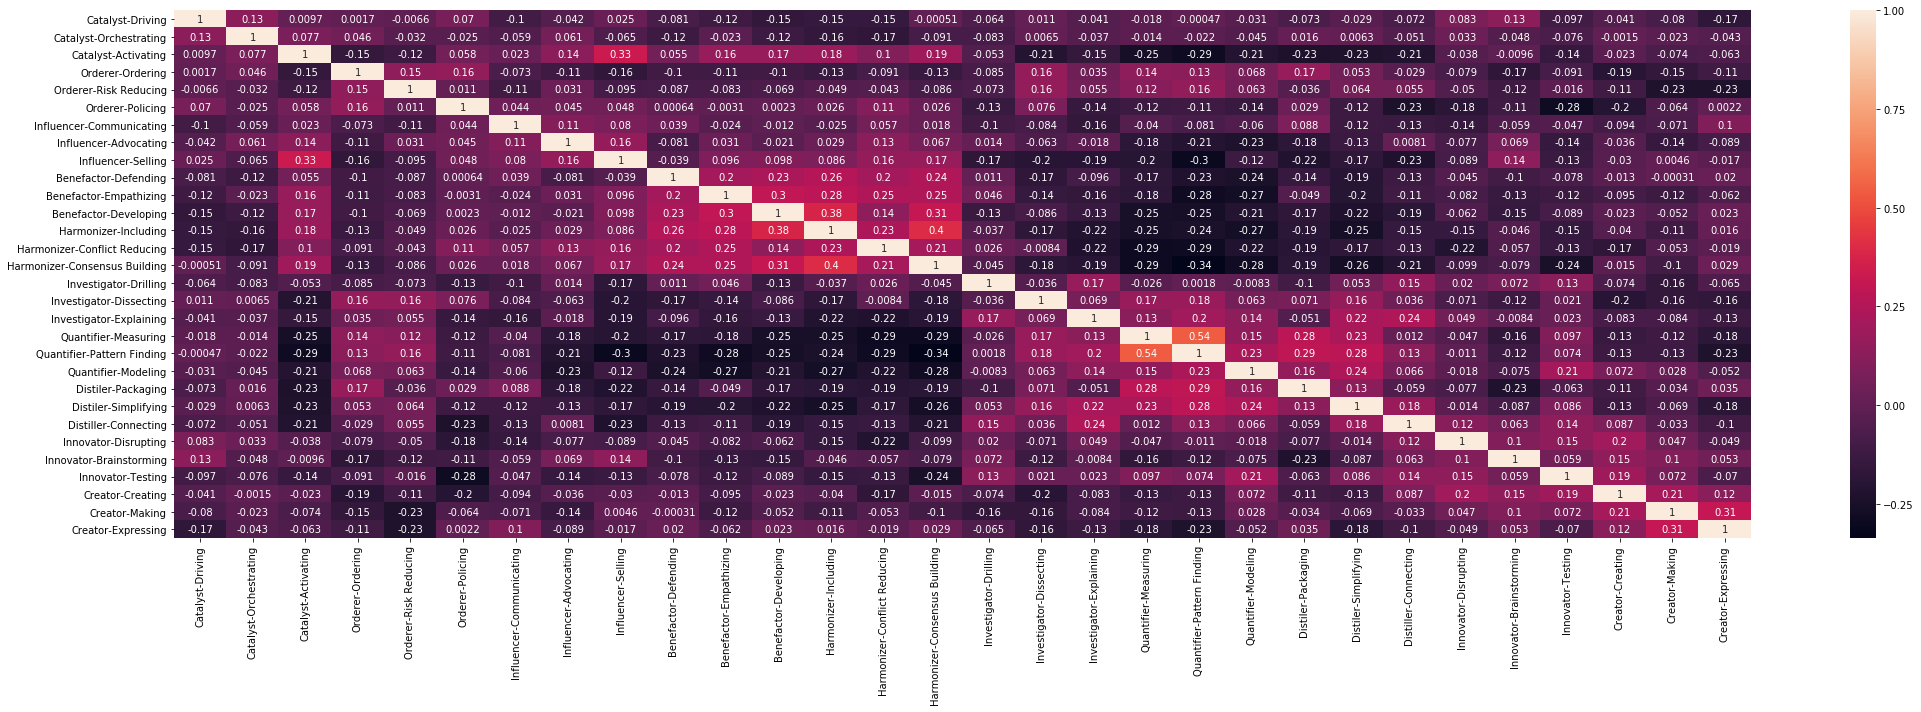

In [658]:
#Correlation Matrix between all answers
corrmat = ratings1.corr(method='spearman')

#plot pivot table as heatmap using seaborn
plt.figure(figsize=(30, 10))
ax = sns.heatmap(corrmat, annot=True)
plt.tight_layout()
plt.show()

In [659]:
ratings2 = ratings['Section']

In [660]:
ratings3 = pd.concat([ratings2, ratings1], axis=1)
ratings3.head()

,Section,Catalyst-Driving,Catalyst-Orchestrating,Catalyst-Activating,Orderer-Ordering,Orderer-Risk Reducing,Orderer-Policing,Influencer-Communicating,Influencer-Advocating,Influencer-Selling,...,Quantifier-Modeling,Distiler-Packaging,Distiler-Simplifying,Distiller-Connecting,Innovator-Disrupting,Innovator-Brainstorming,Innovator-Testing,Creator-Creating,Creator-Making,Creator-Expressing
0,MCC,1.209416,1.209416,-1.382189,0.561514,-0.734288,-1.382189,-0.086387,-0.734288,-1.382189,...,-0.086387,0.561514,-0.086387,-0.734288,1.209416,1.209416,-0.086387,-1.382189,-1.382189,-0.086387
1,MBD,0.293047,0.293047,-0.506172,0.293047,0.293047,-2.104610,0.293047,0.293047,-0.506172,...,1.092266,1.092266,0.293047,0.293047,1.092266,0.293047,0.293047,1.092266,-2.104610,1.092266
2,MVDM,1.179536,0.442326,1.179536,-1.769303,-1.032094,0.442326,0.442326,-0.294884,1.179536,...,-1.032094,-1.032094,-1.032094,-0.294884,1.179536,1.179536,-0.294884,1.179536,1.179536,0.442326
3,MCC,1.269622,0.211604,0.211604,0.211604,0.211604,-0.846415,-0.846415,-0.846415,-0.846415,...,-0.846415,1.269622,-1.904433,0.211604,0.211604,0.211604,-0.846415,0.211604,-1.904433,0.211604
4,MRCB,-0.924711,-0.924711,-0.174945,-0.174945,-0.174945,0.574820,1.324586,0.574820,-0.924711,...,-1.674477,1.324586,-0.174945,-1.674477,0.574820,-0.924711,-0.924711,-0.924711,-1.674477,0.574820


In [661]:
ratings3.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'BIP', 'MCXI', 'MCS', 'BIC',
       'EXMPLS', 'BIS'], dtype=object)

In [662]:
means = ratings3.groupby(['Section']).mean()

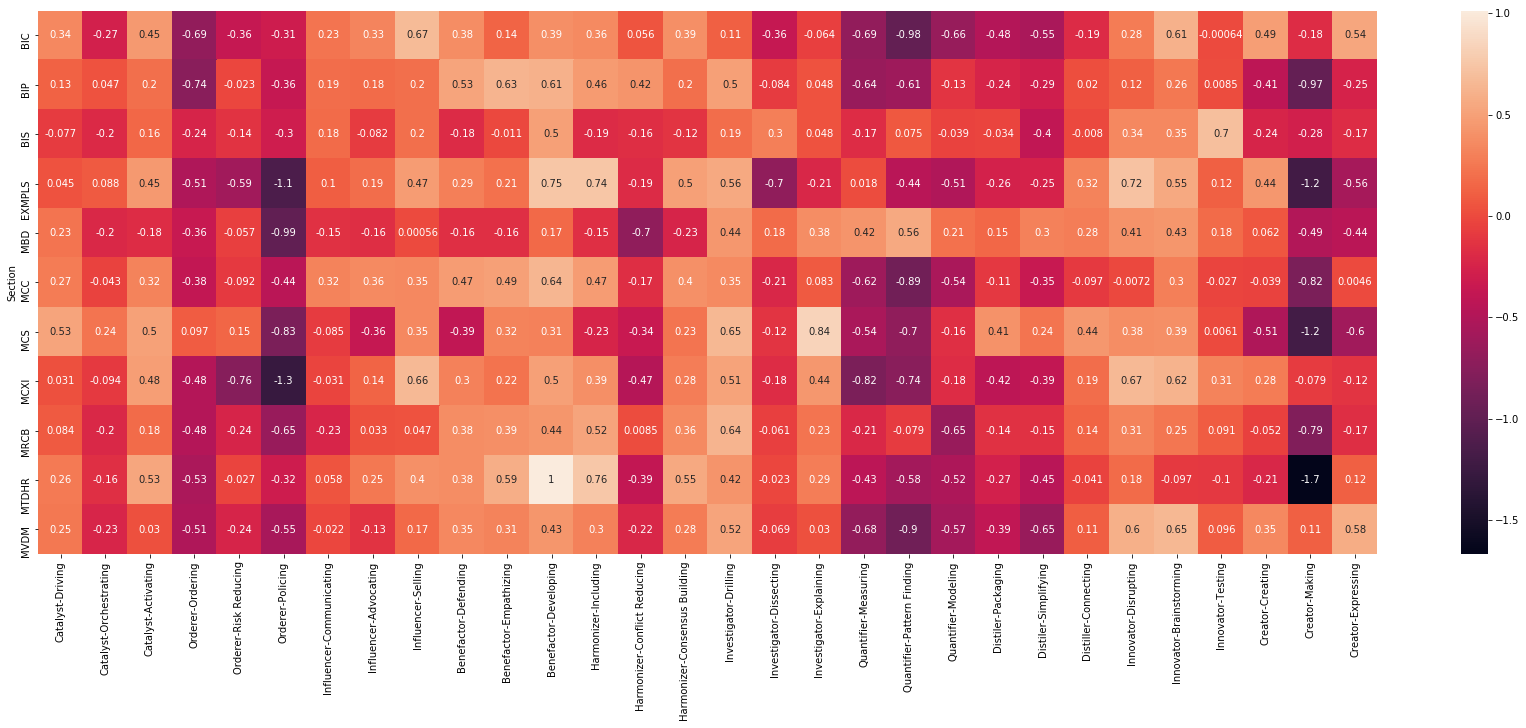

In [663]:
#plot pivot table as heatmap using seaborn
plt.figure(figsize=(30, 10))
ax = sns.heatmap(means, annot=True)
#plt.setp(ax, rotation=90 )
#plt.tight_layout()
plt.show()


In [664]:
stdmeans = pd.DataFrame(means.std())
stdmeans

,0
Catalyst-Driving,0.170144
Catalyst-Orchestrating,0.158902
Catalyst-Activating,0.227504
Orderer-Ordering,0.226261
Orderer-Risk Reducing,0.267490
Orderer-Policing,0.354668
Influencer-Communicating,0.171778
Influencer-Advocating,0.228359
Influencer-Selling,0.223396
Benefactor-Defending,0.306280


In [665]:
#Assign values to Gender: Male = 0, Female = 1
ratings['Gender'] = ratings['Gender'].map({'Female': 'Female','Mujer': 'Female', 'Male': 'Male','Hombre': 'Male' })
ratings5 = ratings['Gender']

ratings4 = pd.concat([ratings5, ratings3], axis=1)
ratings4.head()

,Gender,Section,Catalyst-Driving,Catalyst-Orchestrating,Catalyst-Activating,Orderer-Ordering,Orderer-Risk Reducing,Orderer-Policing,Influencer-Communicating,Influencer-Advocating,...,Quantifier-Modeling,Distiler-Packaging,Distiler-Simplifying,Distiller-Connecting,Innovator-Disrupting,Innovator-Brainstorming,Innovator-Testing,Creator-Creating,Creator-Making,Creator-Expressing
0,Male,MCC,1.209416,1.209416,-1.382189,0.561514,-0.734288,-1.382189,-0.086387,-0.734288,...,-0.086387,0.561514,-0.086387,-0.734288,1.209416,1.209416,-0.086387,-1.382189,-1.382189,-0.086387
1,Male,MBD,0.293047,0.293047,-0.506172,0.293047,0.293047,-2.104610,0.293047,0.293047,...,1.092266,1.092266,0.293047,0.293047,1.092266,0.293047,0.293047,1.092266,-2.104610,1.092266
2,Female,MVDM,1.179536,0.442326,1.179536,-1.769303,-1.032094,0.442326,0.442326,-0.294884,...,-1.032094,-1.032094,-1.032094,-0.294884,1.179536,1.179536,-0.294884,1.179536,1.179536,0.442326
3,Female,MCC,1.269622,0.211604,0.211604,0.211604,0.211604,-0.846415,-0.846415,-0.846415,...,-0.846415,1.269622,-1.904433,0.211604,0.211604,0.211604,-0.846415,0.211604,-1.904433,0.211604
4,Female,MRCB,-0.924711,-0.924711,-0.174945,-0.174945,-0.174945,0.574820,1.324586,0.574820,...,-1.674477,1.324586,-0.174945,-1.674477,0.574820,-0.924711,-0.924711,-0.924711,-1.674477,0.574820


In [666]:
gendermean = ratings4.groupby(['Section','Gender']).mean()

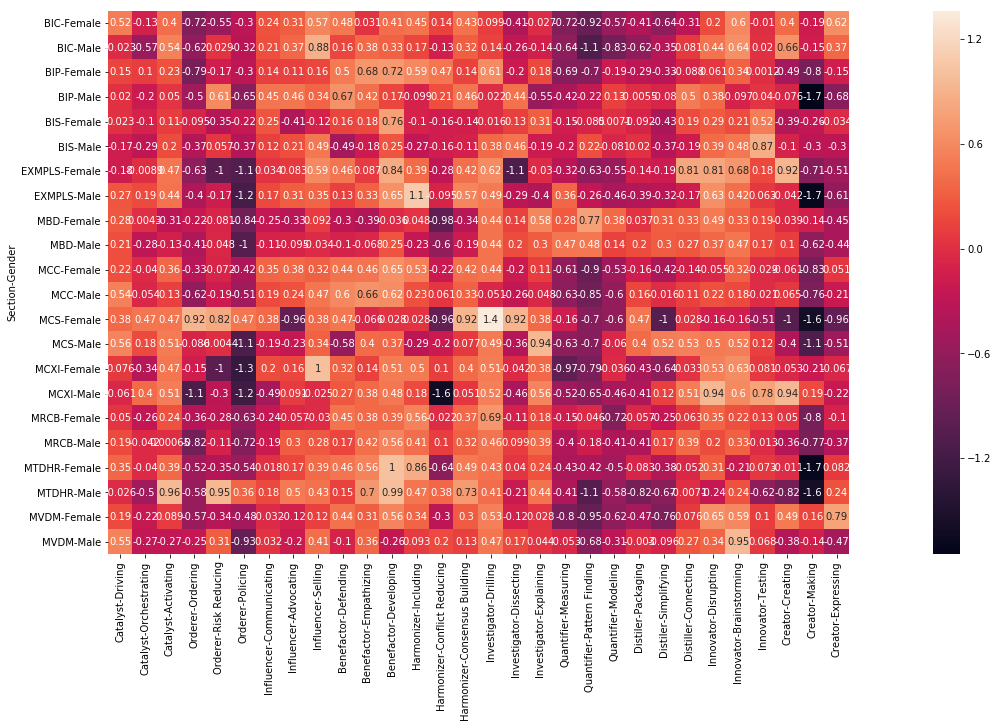

In [667]:
#plot pivot table as heatmap using seaborn
plt.figure(figsize=(30, 10))
ax = sns.heatmap(gendermean, annot=True, square=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()


In [668]:
genderstd = ratings4.groupby(['Section','Gender']).std()
genderstd

Catalyst-Driving  Catalyst-Orchestrating  Catalyst-Activating  \
Section Gender                                                                  
BIC     Female          0.904939                0.872116             0.822095   
        Male            0.916673                0.949708             0.568862   
BIP     Female          0.920899                0.837324             0.891017   
        Male            1.576784                0.856735             0.807865   
BIS     Female          0.849324                0.703938             0.892803   
        Male            0.793491                1.169425             0.798543   
EXMPLS  Female          1.152165                0.876999             0.923853   
        Male            1.098929                1.148096             1.092736   
MBD     Female          1.082836                0.775090             0.987653   
        Male            1.091367                0.930980             1.052609   
MCC     Female          0.879987                0.862646             0.851446   
        Male            0.871454                1.156833             1.080689   
MCS     Female          0.638194                0.752701             0.752701   
        Male            0.847997                0.940506             1.224085   
MCXI    Female          1.103480                1.143444             0.991582   
        Male            0.908646                0.791677             0.778352   
MRCB    Female          1.061730                0.931494             0.816421   
        Male            0.709729                0.977023             1.161029   
MTDHR   Female          0.930460                0.744413             0.988941   
        Male            1.079389                0.896940             0.573891   
MVDM    Female          0.780171                1.063989             1.049175   
        Male            1.108791                0.803048             1.101583   

                Orderer-Ordering  Orderer-Risk Reducing  Orderer-Policing  \
Section Gender                                                              
BIC     Female          0.973654               0.809539          1.175637   
        Male            1.066929               0.670931          0.943651   
BIP     Female          0.986207               1.012120          1.008770   
        Male            1.341317               0.636537          0.864993   
BIS     Female          0.680088               0.851200          1.186007   
        Male            1.173901               0.999375          1.082589   
EXMPLS  Female          1.121024               0.629217          0.763406   
        Male            0.961729               0.923793          0.824262   
MBD     Female          1.137435               0.735068          0.978456   
        Male            1.122787               0.934723          1.071034   
MCC     Female          1.203403               0.704975          1.101269   
        Male            0.989483               0.726458          1.254711   
MCS     Female          0.123315               1.267580          0.752701   
        Male            1.236671               0.967580          0.881289   
MCXI    Female          1.107675               0.854402          0.694030   
        Male            0.906554               0.694369          0.576185   
MRCB    Female          1.042571               0.849499          1.049324   
        Male            0.838247               1.330147          0.944960   
MTDHR   Female          1.289813               0.678974          0.857590   
        Male            0.843673               0.974346          1.236041   
MVDM    Female          1.023769               0.782795          0.936155   
        Male            1.020802               1.203405          1.174855   

                Influencer-Communicating  Influencer-Advocating  \
Section Gender                                                    
BIC     Female                  0.881327               0.915881   
        Male         

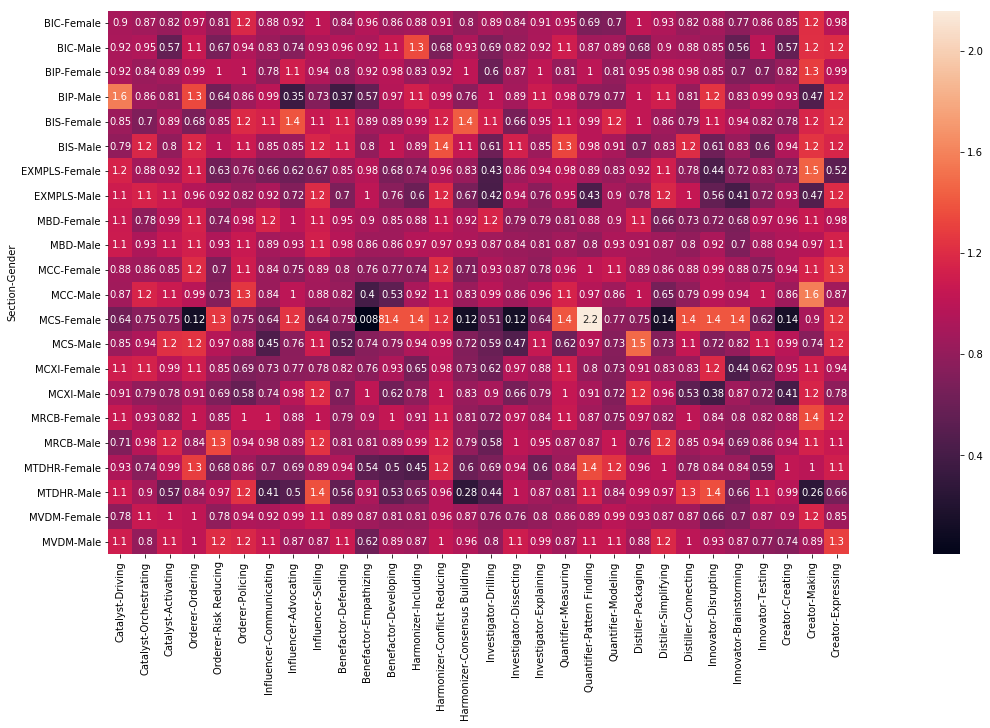

In [669]:
#plot pivot table as heatmap using seaborn
plt.figure(figsize=(30, 10))
ax = sns.heatmap(genderstd, annot=True, square=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
#plt.tight_layout()
plt.show()


In [670]:
ratings3['Section'].unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'BIP', 'MCXI', 'MCS', 'BIC',
       'EXMPLS', 'BIS'], dtype=object)

In [671]:
ratings3['Section'] = ratings3['Section'].map({'MCC' :0,'MBD':1,'MVDM':2,'MRCB' : 3, 'MTDHR': 4, 'BIP' : 5, 'MCXI' : 6,'MCS' : 8, 'BIC' : 9, 'EXMPLS' : 10, 'BIS' : 11})

In [672]:
ratings3['Section'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11], dtype=int64)

In [673]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X1 = ratings3.drop(['Section'],axis=1)
Y1 = ratings3.Section.values

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=2,
    
    random_state = 10
)
decision_tree.fit(X1,Y1)

# Render tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X1.columns,
    class_names=ratings2.unique(),
    filled=True
)

from pydotplus import graphviz

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [674]:
# Convert data for second feature selection method
X = np.array(ratings3.drop(['Section'],axis=1)) 
Y = np.array(ratings3['Section'])

In [675]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from itertools import product

In [676]:
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, Y)
clf2.fit(X, Y)
clf3.fit(X, Y)
eclf.fit(X, Y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 1, 2])

***Potential Order of Questions*** (based on best description of the overall model)

***EXMPLS & Bachelors out in the first questions***

['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR','MCXI', 'MCS']


In [677]:
ratings6 = ratings4
ratings6 = ratings4[ratings4.Section != 'BIP']
ratings7 = ratings6[ratings6.Section != 'EXMPLS']
ratings8 = ratings7[ratings7.Section != 'BIC']
ratings9 = ratings8[ratings8.Section != 'BIS']
ratings10 = ratings9
ratings10.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS'], dtype=object)

In [678]:
#Feature Selection. Scores for the most relevant features (should we start with the one that has more explanatory power)
from sklearn.feature_selection import SelectKBest

# feature extraction
test = SelectKBest()
fit = test.fit(X10, Y10)

# summarize scores
#print(fit.scores_)
#features = fit.transform(X)
#list(zip(X1.columns, features))

#Identify features with highest score from a predictive perspective (for all programs)
names2 = X1.columns
Bestfeatures = pd.DataFrame(fit.scores_, index = names2)
Bestfeatures.columns = ['Potential Order of Questions']
Bestfeatures.sort_values(by=['Potential Order of Questions'], ascending=False)

,Potential Order of Questions
Quantifier-Pattern Finding,26.366009
Quantifier-Measuring,14.806438
Distiler-Simplifying,9.294443
Quantifier-Modeling,8.287137
Creator-Making,8.237509
Harmonizer-Including,7.365993
Harmonizer-Consensus Building,6.525046
Benefactor-Empathizing,6.221896
Creator-Expressing,5.838742
Benefactor-Defending,5.695049


***MCC***

In [679]:
ratings10['Section'] = ratings10['Section'].map({'MCC' :1,'MBD':0,'MVDM':0,'MRCB' : 0, 'MTDHR': 0, 'MCXI' : 0,'MCS' : 0, })

ratings10.Section.unique()

array([1, 0], dtype=int64)

In [680]:
#Upsample the minority class

# Separate majority and minority classes
ratings10_majority = ratings10[ratings10.Section==0]
ratings10_minority = ratings10[ratings10.Section==1]
 
# Upsample minority class
ratings10_minority_upsampled = resample(ratings10_minority, replace=True, n_samples=268, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings10_upsampled = pd.concat([ratings10_majority, ratings10_minority_upsampled])
 
# Display new class counts
ratings10_upsampled.Section.value_counts()

1    268
0    268
Name: Section, dtype: int64

In [681]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X2 = ratings10_upsampled.drop(['Section','Gender'],axis=1)
Y2 = ratings10_upsampled.Section.values

In [682]:
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[1, 1, 1])
from sklearn.naive_bayes import GaussianNB

clf4 = GaussianNB()

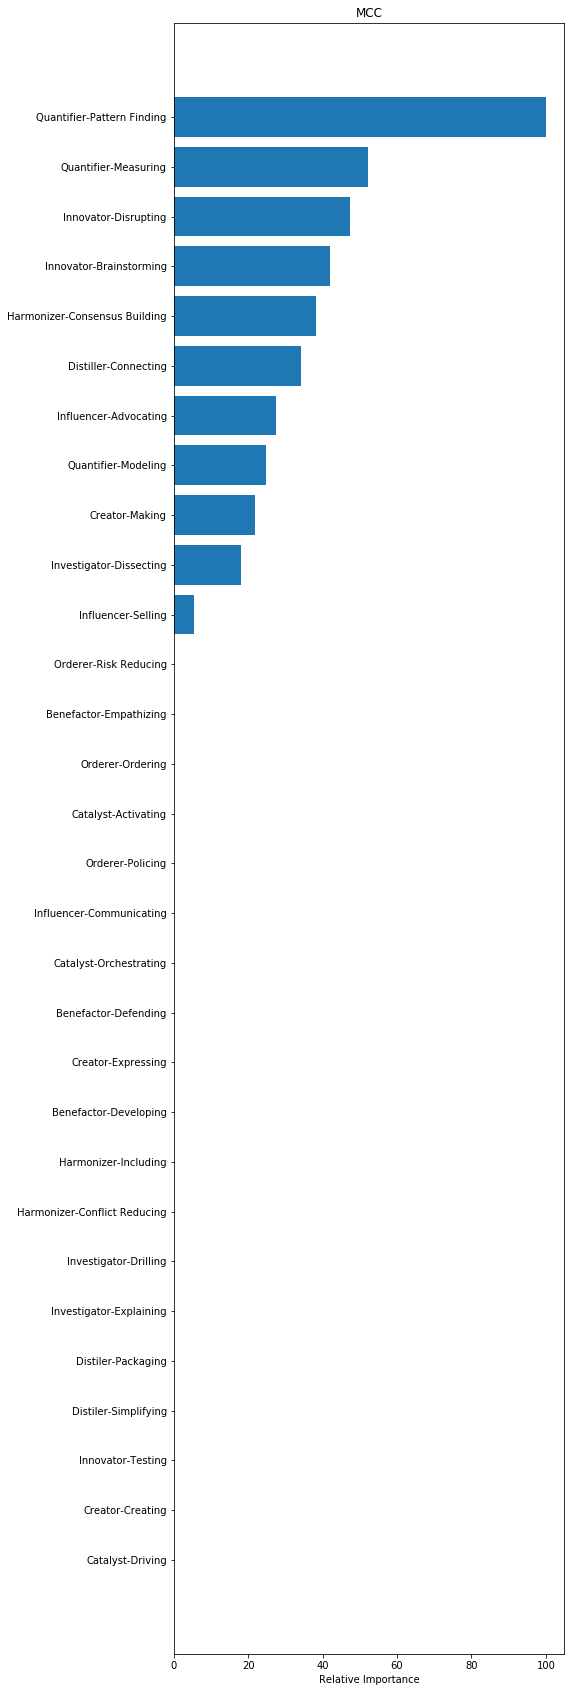

In [683]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X2, Y2)


feature_importance2 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance2 = 100.0 * (feature_importance2 / feature_importance2.max())
sorted_idx = np.argsort(feature_importance2)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance2[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MCC')
plt.show()

***MBD***

In [684]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [685]:
ratings11 = ratings8[ratings8.Section != 'BIS']

ratings11['Section'] = ratings11['Section'].map({'MCC' :0,'MBD':1,'MVDM':0,'MRCB' : 0, 'MTDHR': 0, 'MCXI' : 0,'MCS' : 0 })

ratings11.Section.unique()
ratings11.Section.value_counts()

0    228
1    109
Name: Section, dtype: int64

In [686]:
#Upsample the minority class

# Separate majority and minority classes
ratings11_majority = ratings11[ratings11.Section==0]
ratings11_minority = ratings11[ratings11.Section==1]
 
# Upsample minority class
ratings11_minority_upsampled = resample(ratings11_minority, replace=True, n_samples=228, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings11_upsampled = pd.concat([ratings11_majority, ratings11_minority_upsampled])
 
# Display new class counts
ratings11_upsampled.Section.value_counts()

1    228
0    228
Name: Section, dtype: int64

In [687]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X3 = ratings11_upsampled.drop(['Section','Gender'],axis=1)
Y3 = ratings11_upsampled.Section.values

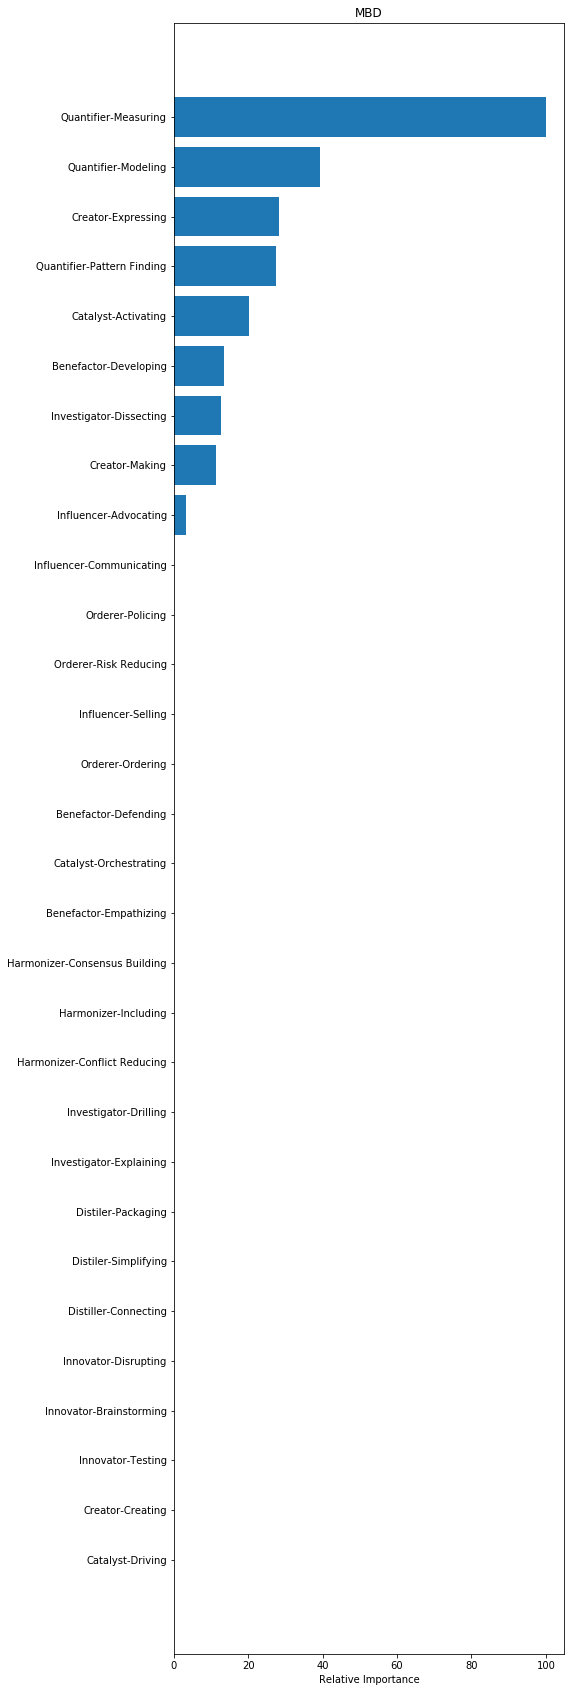

In [688]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X3, Y3)


feature_importance3 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance3 = 100.0 * (feature_importance3 / feature_importance3.max())
sorted_idx = np.argsort(feature_importance3)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance3[sorted_idx], align='center')
plt.yticks(pos, X3.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MBD')
plt.show()

***MVDM***

In [689]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [690]:
ratings12 = ratings8[ratings8.Section != 'BIS']

ratings12['Section'] = ratings12['Section'].map({'MCC' :0,'MBD':0,'MVDM':1,'MRCB' : 0, 'MTDHR': 0, 'MCXI' : 0,'MCS' : 0 })

ratings12.Section.unique()
ratings12.Section.value_counts()

0    282
1     55
Name: Section, dtype: int64

In [691]:
#Upsample the minority class

# Separate majority and minority classes
ratings12_majority = ratings12[ratings12.Section==0]
ratings12_minority = ratings12[ratings12.Section==1]
 
# Upsample minority class
ratings12_minority_upsampled = resample(ratings12_minority, replace=True, n_samples=282, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings12_upsampled = pd.concat([ratings12_majority, ratings12_minority_upsampled])
 
# Display new class counts
ratings12_upsampled.Section.value_counts()

1    282
0    282
Name: Section, dtype: int64

In [692]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X4 = ratings12_upsampled.drop(['Section','Gender'],axis=1)
Y4 = ratings12_upsampled.Section.values

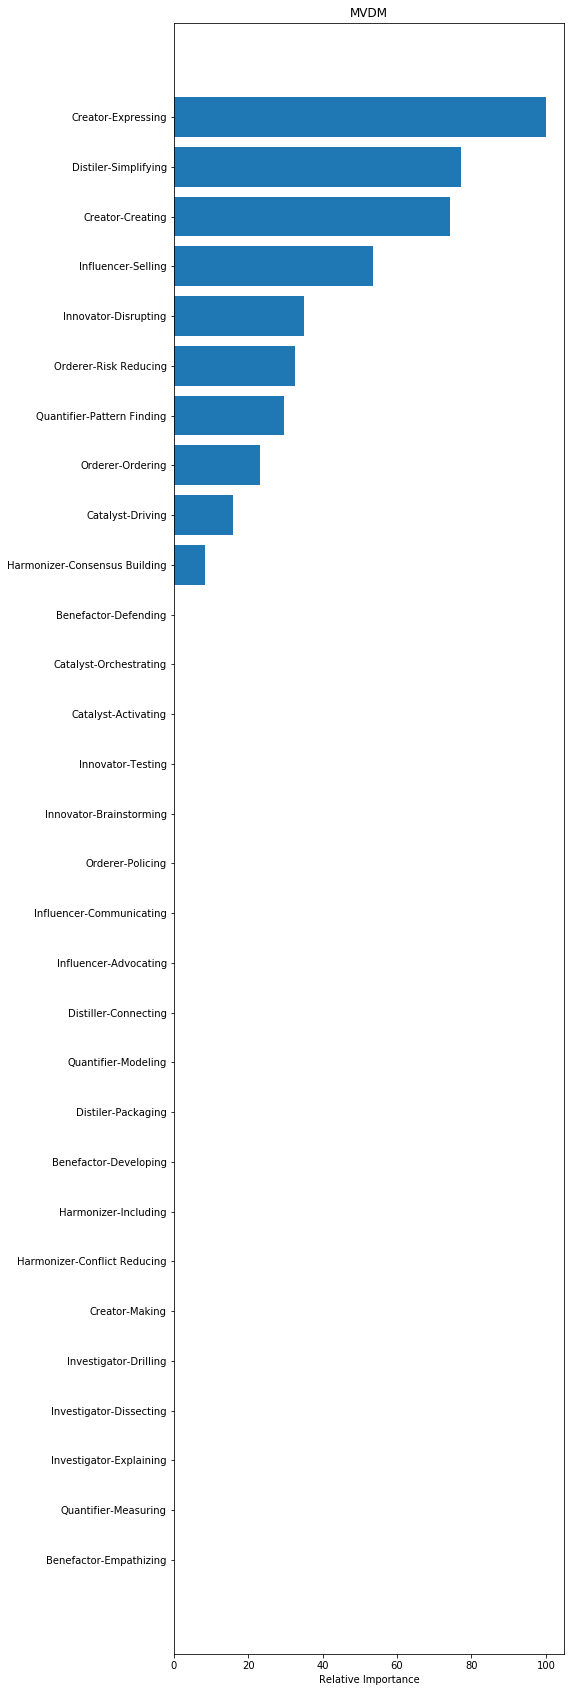

In [693]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X4, Y4)


feature_importance4 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance4 = 100.0 * (feature_importance4/ feature_importance4.max())
sorted_idx = np.argsort(feature_importance4)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance4[sorted_idx], align='center')
plt.yticks(pos, X4.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MVDM')
plt.show()

***MRCB***

In [694]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [695]:
ratings13 = ratings8[ratings8.Section != 'BIS']

ratings13['Section'] = ratings13['Section'].map({'MCC' :0,'MBD':0,'MVDM':0,'MRCB' : 1, 'MTDHR': 0, 'MCXI' : 0,'MCS' : 0 })

ratings13.Section.unique()
ratings13.Section.value_counts()

0    281
1     56
Name: Section, dtype: int64

In [696]:
#Upsample the minority class

# Separate majority and minority classes
ratings13_majority = ratings13[ratings13.Section==0]
ratings13_minority = ratings13[ratings13.Section==1]
 
# Upsample minority class
ratings13_minority_upsampled = resample(ratings13_minority, replace=True, n_samples=281, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings13_upsampled = pd.concat([ratings13_majority, ratings13_minority_upsampled])
 
# Display new class counts
ratings13_upsampled.Section.value_counts()

1    281
0    281
Name: Section, dtype: int64

In [697]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X5 = ratings13_upsampled.drop(['Section','Gender'],axis=1)
Y5 = ratings13_upsampled.Section.values

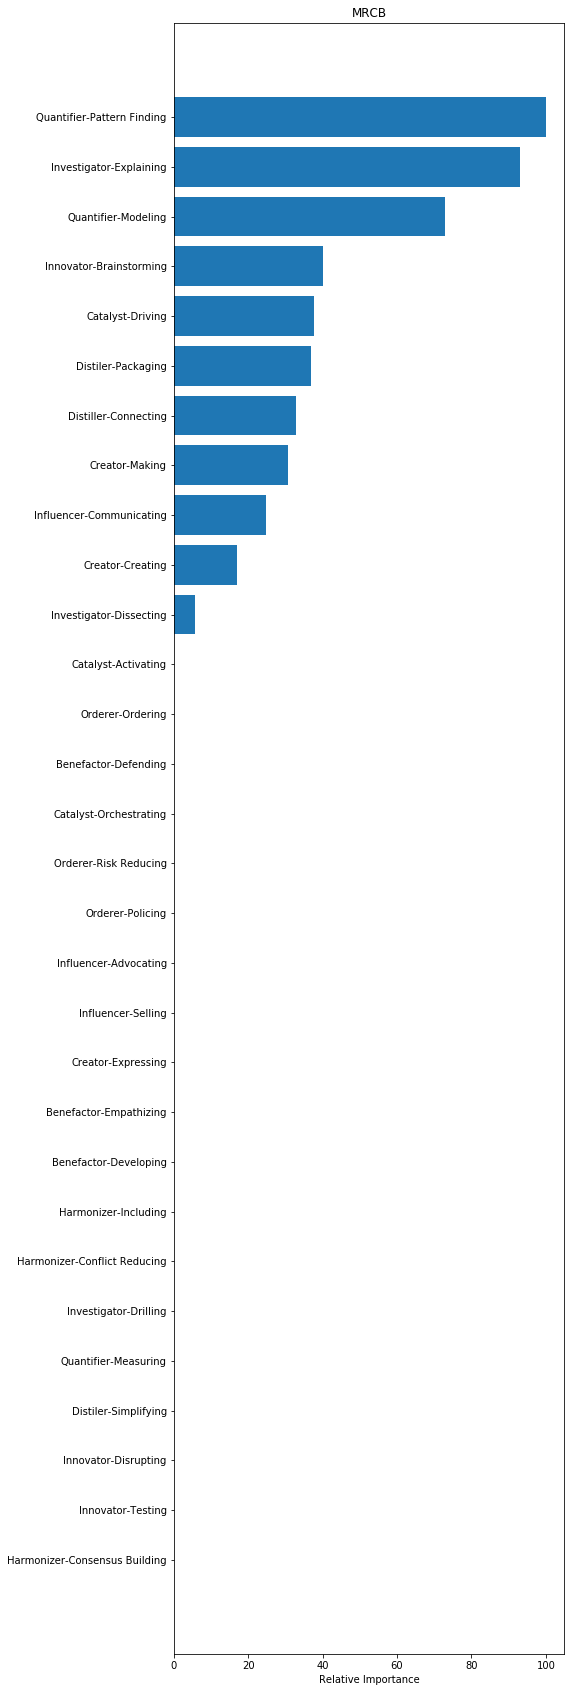

In [698]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X5, Y5)


feature_importance5 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance5 = 100.0 * (feature_importance5 / feature_importance5.max())
sorted_idx = np.argsort(feature_importance5)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance5[sorted_idx], align='center')
plt.yticks(pos, X5.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MRCB')
plt.show()

***MTDHR***

In [699]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [700]:
ratings14 = ratings8[ratings8.Section != 'BIS']

ratings14['Section'] = ratings14['Section'].map({'MCC' :0,'MBD':0,'MVDM':0,'MRCB' : 0, 'MTDHR': 1, 'MCXI' : 0,'MCS' : 0 })

ratings14.Section.unique()
ratings14.Section.value_counts()

0    321
1     16
Name: Section, dtype: int64

In [701]:
#Upsample the minority class

# Separate majority and minority classes
ratings14_majority = ratings14[ratings14.Section==0]
ratings14_minority = ratings14[ratings14.Section==1]
 
# Upsample minority class
ratings14_minority_upsampled = resample(ratings14_minority, replace=True, n_samples=321, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings14_upsampled = pd.concat([ratings14_majority, ratings14_minority_upsampled])
 
# Display new class counts
ratings14_upsampled.Section.value_counts()

1    321
0    321
Name: Section, dtype: int64

In [702]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X6 = ratings14_upsampled.drop(['Section','Gender'],axis=1)
Y6 = ratings14_upsampled.Section.values

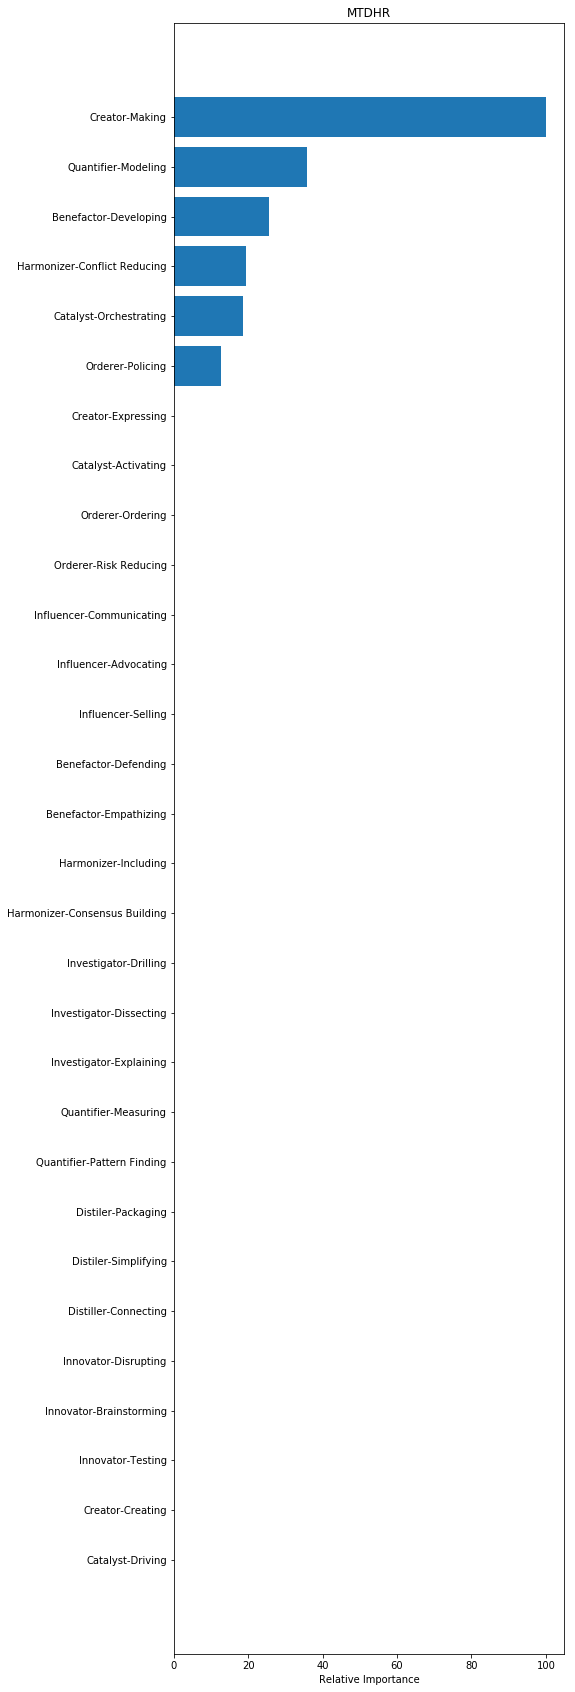

In [703]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X6, Y6)


feature_importance6 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance6 = 100.0 * (feature_importance6 / feature_importance6.max())
sorted_idx = np.argsort(feature_importance6)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance6[sorted_idx], align='center')
plt.yticks(pos, X6.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MTDHR')
plt.show()

***MCXI***

In [704]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [705]:
ratings15 = ratings8[ratings8.Section != 'BIS']

ratings15['Section'] = ratings15['Section'].map({'MCC' :0,'MBD':0,'MVDM':0,'MRCB' : 0, 'MTDHR': 0, 'MCXI' : 1,'MCS' : 0 })

ratings15.Section.unique()
ratings15.Section.value_counts()

0    316
1     21
Name: Section, dtype: int64

In [706]:
#Upsample the minority class

# Separate majority and minority classes
ratings15_majority = ratings15[ratings15.Section==0]
ratings15_minority = ratings15[ratings15.Section==1]
 
# Upsample minority class
ratings15_minority_upsampled = resample(ratings15_minority, replace=True, n_samples=316, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings15_upsampled = pd.concat([ratings15_majority, ratings15_minority_upsampled])
 
# Display new class counts
ratings15_upsampled.Section.value_counts()

1    316
0    316
Name: Section, dtype: int64

In [707]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X7 = ratings15_upsampled.drop(['Section','Gender'],axis=1)
Y7 = ratings15_upsampled.Section.values

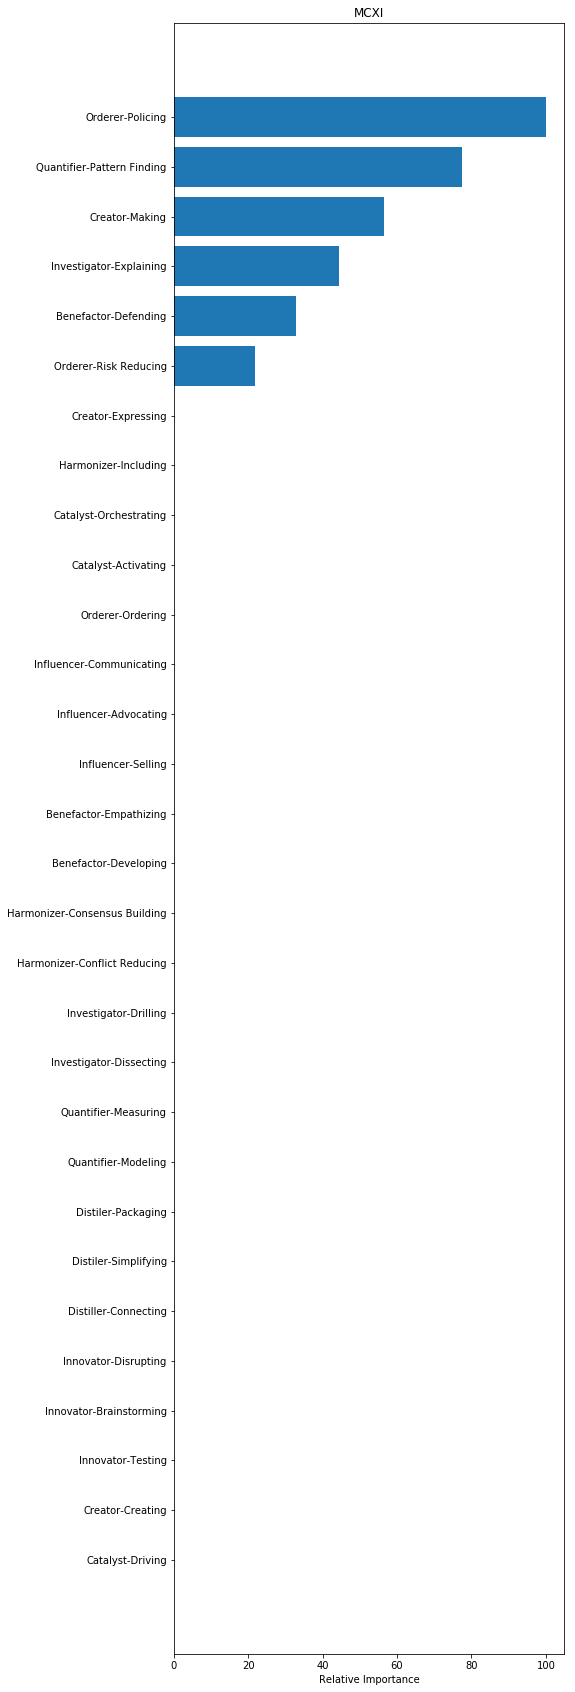

In [708]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X7, Y7)


feature_importance7 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance7 = 100.0 * (feature_importance7 / feature_importance7.max())
sorted_idx = np.argsort(feature_importance7)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance7[sorted_idx], align='center')
plt.yticks(pos, X7.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MCXI')
plt.show()

***MCS***

In [709]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [710]:
ratings16 = ratings8[ratings8.Section != 'BIS']

ratings16['Section'] = ratings16['Section'].map({'MCC' :0,'MBD':0,'MVDM':0,'MRCB' : 0, 'MTDHR': 0, 'MCXI' : 0,'MCS' : 1 })

ratings16.Section.unique()
ratings16.Section.value_counts()

0    326
1     11
Name: Section, dtype: int64

In [711]:
#Upsample the minority class

# Separate majority and minority classes
ratings16_majority = ratings16[ratings16.Section==0]
ratings16_minority = ratings16[ratings16.Section==1]
 
# Upsample minority class
ratings16_minority_upsampled = resample(ratings16_minority, replace=True, n_samples=326, random_state=123) 
 
# Combine majority class with upsampled minority class
ratings16_upsampled = pd.concat([ratings16_majority, ratings16_minority_upsampled])
 
# Display new class counts
ratings16_upsampled.Section.value_counts()

1    326
0    326
Name: Section, dtype: int64

In [712]:
#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X8 = ratings16_upsampled.drop(['Section','Gender'],axis=1)
Y8 = ratings16_upsampled.Section.values

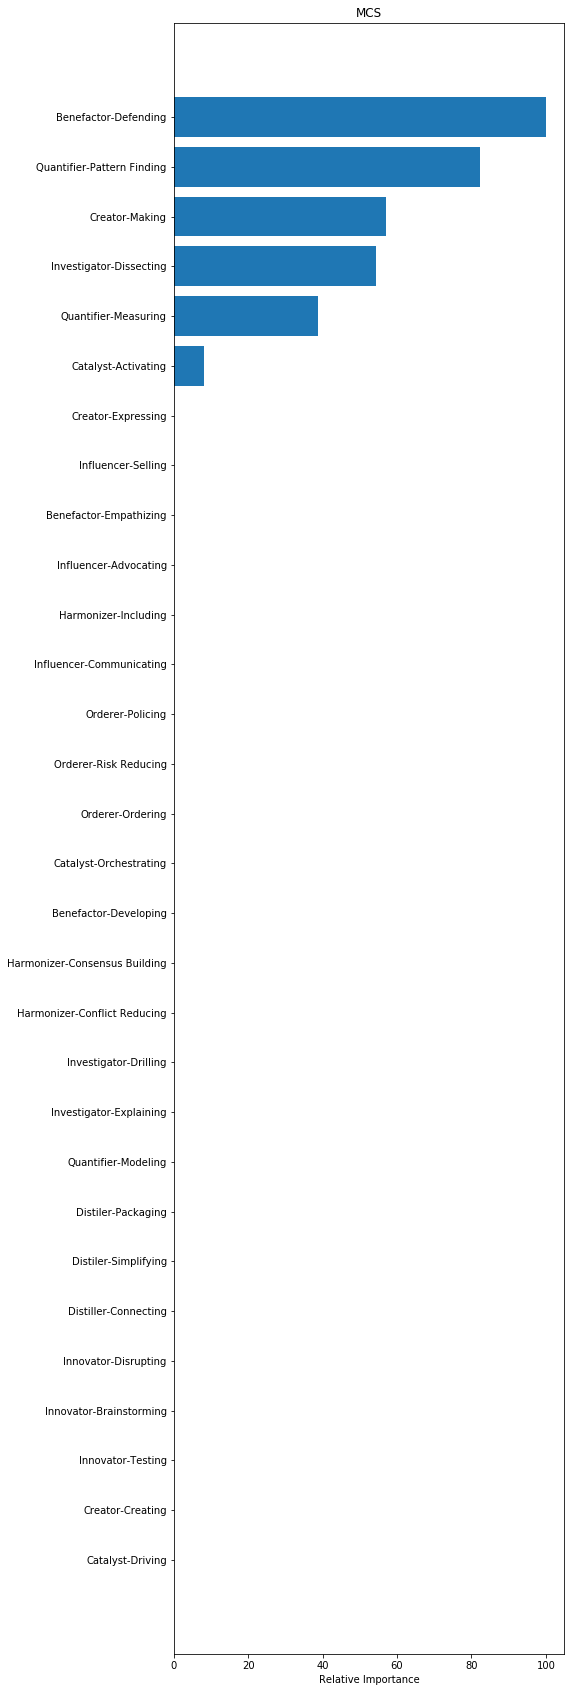

In [713]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(X8, Y8)


feature_importance8 = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance8 = 100.0 * (feature_importance8 / feature_importance8.max())
sorted_idx = np.argsort(feature_importance8)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(7, 30))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance8[sorted_idx], align='center')
plt.yticks(pos, X8.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('MCS')
plt.show()

In [714]:
# View a list of the features and their importance scores
mcc = list(zip(X2.columns, feature_importance2))
mbd = list(zip(X3.columns, feature_importance3))
mvdm = list(zip(X4.columns, feature_importance4))
mrcb = list(zip(X5.columns, feature_importance5))
mtdhr = list(zip(X6.columns, feature_importance6))
mcxi = list(zip(X7.columns, feature_importance7))
mcs = list(zip(X8.columns, feature_importance8))

In [715]:
#Feature Importance for each program
names=['mcc','mbd', 'mvdm','mrcb','mtdhr','mcxi','mcs']
names2 = X2.columns
programfeatures = pd.DataFrame(list(zip(feature_importance2, feature_importance3, feature_importance4, feature_importance5,
                                        feature_importance6, feature_importance7, feature_importance8)),columns = names, index=names2)


programfeatures = programfeatures.round(2)

***Summary of relative importance of features to describe each program***

In [716]:
#Summary Importance of features to describe each of the programs
programfeatures

,mcc,mbd,mvdm,mrcb,mtdhr,mcxi,mcs
Catalyst-Driving,0.00,0.00,15.95,37.70,0.00,0.00,0.00
Catalyst-Orchestrating,0.00,0.00,0.00,0.00,18.56,0.00,0.00
Catalyst-Activating,0.00,20.14,0.00,0.00,0.00,0.00,8.00
Orderer-Ordering,0.00,0.00,23.04,0.00,0.00,0.00,0.00
Orderer-Risk Reducing,0.00,0.00,32.64,0.00,0.00,21.85,0.00
Orderer-Policing,0.00,0.00,0.00,0.00,12.58,100.00,0.00
Influencer-Communicating,0.00,0.00,0.00,24.70,0.00,0.00,0.00
Influencer-Advocating,27.52,3.36,0.00,0.00,0.00,0.00,0.00
Influencer-Selling,5.43,0.00,53.43,0.00,0.00,0.00,0.00
Benefactor-Defending,0.00,0.00,0.00,0.00,0.00,32.77,100.00


***Data prepared for modelling***

In [717]:
ratings8.Section.unique()

array(['MCC', 'MBD', 'MVDM', 'MRCB', 'MTDHR', 'MCXI', 'MCS', 'BIS'], dtype=object)

In [718]:
ratings17 = ratings8[ratings8.Section != 'BIS']

ratings17['Section'] = ratings17['Section'].map({'MCC' :0,'MBD':1,'MVDM':2,'MRCB' : 3, 'MTDHR': 4, 'MCXI' : 5,'MCS' : 6 })

#Decision tree, which question is giving us more information

#Convert data so that we can run a tree
X10 = ratings17.drop(['Section','Gender'],axis=1)
Y10 = ratings17.Section.values